In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train /255.0
X_test = X_test /255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
def show_image(img):
  plt.imshow(img, cmap='binary')

In [4]:
# split data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=46)

# prepare label
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [12]:
# buat arsitektur CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

model = Sequential()

# conv - pooling (2x)
model.add(Conv2D(16, 3, activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.35))
model.add(MaxPool2D(2))

# ubah ke vektor
model.add(Flatten())

# fully connected untuk prediksi
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax')) # ada 10 kelas/label pada data MNIST


In [13]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training model
history = model.fit(X_train,
                    y_train_ohe,
                    epochs=30, # pengulangan feedforward dan backprop
                    batch_size=64, # ukuran data dalam 1 batch
                    validation_data=(X_val, y_val_ohe))

Epoch 1/30
797/797 [==============================] - 6s 7ms/step - loss: 0.2810 - accuracy: 0.9126 - val_loss: 0.0835 - val_accuracy: 0.9803
Epoch 2/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0936 - accuracy: 0.9718 - val_loss: 0.0465 - val_accuracy: 0.9882
Epoch 3/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0348 - val_accuracy: 0.9918
Epoch 4/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 5/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0300 - val_accuracy: 0.9922
Epoch 6/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 7/30
797/797 [==============================] - 5s 6ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0287 - val_accuracy: 0.9926
Epoch 

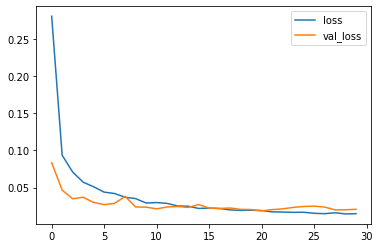

In [14]:
import pandas as pd
from sklearn.metrics import classification_report

metrics = pd.DataFrame(history.history)

metrics[['loss', 'val_loss']].plot();

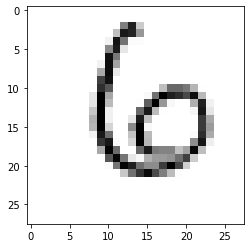

In [15]:
new_data = X_test[100]
show_image(new_data)

In [17]:
new_data.shape

(28, 28)

In [19]:
res = model.predict(new_data.reshape((1,28,28)))
res.argmax()

6

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Use Case Dataset


## Set Up Google Drive

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
# navigasi ke folder
% cd /content/gdrive/My Drive/motogp_cnn

/content/gdrive/My Drive/motogp_cnn


In [26]:
# cek
!pwd


/content/gdrive/MyDrive/motogp_cnn


## Ekplorasi Data

In [27]:
import os

# ekplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk("dataset_motogp"):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 2 folder dan 0 gambar di direktori dataset_motogp
Ada 6 folder dan 0 gambar di direktori dataset_motogp/train
Ada 0 folder dan 70 gambar di direktori dataset_motogp/train/marquez
Ada 0 folder dan 70 gambar di direktori dataset_motogp/train/dovizioso
Ada 0 folder dan 75 gambar di direktori dataset_motogp/train/rossi
Ada 0 folder dan 65 gambar di direktori dataset_motogp/train/pedrosa
Ada 0 folder dan 66 gambar di direktori dataset_motogp/train/vinales
Ada 0 folder dan 76 gambar di direktori dataset_motogp/train/lorenzo
Ada 6 folder dan 0 gambar di direktori dataset_motogp/test
Ada 0 folder dan 8 gambar di direktori dataset_motogp/test/dovizioso
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/lorenzo
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/marquez
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/pedrosa
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/rossi
Ada 0 folder dan 9 gambar di direktori dataset_motogp/test/vinales


In [30]:
# dapatkan label data
import pathlib
import numpy as np
data_dir = pathlib.Path('dataset_motogp/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['dovizioso' 'lorenzo' 'marquez' 'pedrosa' 'rossi' 'vinales']


In [39]:
# tampilkan image random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil gambar sembarang
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran Gambar: {img.shape}")
  return img



Ukuran Gambar: (854, 1280, 3)


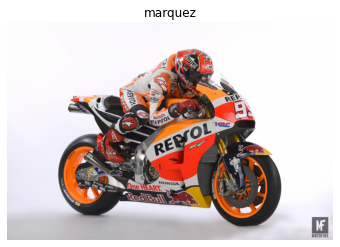

In [43]:
img = view_random_image(target_dir='dataset_motogp/train/',
                        target_class='marquez')

## Data Loading

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# deklarasi objek
train_datagen = ImageDataGenerator(rescale=1./255)
rrain_datagen_augmented = ImageDataGenerator(rescale=1./255, 
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set direktori
train_dir = 'dataset_motogp/train/'
test_dir = 'dataset_motogp/test/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

train_data_augmented = rrain_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

Found 403 images belonging to 6 classes.
Found 403 images belonging to 6 classes.
Found 51 images belonging to 6 classes.


In [58]:
# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = Sequential([Conv2D(8,3, activation='selu', input_shape=(224,224,3)),
                    Dropout(0.3),
                    MaxPool2D(2),
                    Conv2D(32,3, activation='selu'),
                    Dropout(0.3),
                    MaxPool2D(2),
                    Conv2D(32,3, activation='selu'),
                    Dropout(0.3),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(16, activation='relu'),
                    Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 dropout_2 (Dropout)         (None, 222, 222, 8)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      2336      
                                                                 
 dropout_3 (Dropout)         (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [59]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 23s 2s/step - loss: 2.7154 - accuracy: 0.1489 - val_loss: 5.8297 - val_accuracy: 0.1569
Epoch 2/30
13/13 [==============================] - 21s 2s/step - loss: 1.7762 - accuracy: 0.1489 - val_loss: 6.7567 - val_accuracy: 0.1569
Epoch 3/30
13/13 [==============================] - 21s 2s/step - loss: 1.7605 - accuracy: 0.1588 - val_loss: 2.0274 - val_accuracy: 0.1569
Epoch 4/30
13/13 [==============================] - 21s 2s/step - loss: 1.7480 - accuracy: 0.2159 - val_loss: 2.1691 - val_accuracy: 0.1961
Epoch 5/30
13/13 [==============================] - 22s 2s/step - loss: 1.7269 - accuracy: 0.2258 - val_loss: 2.2683 - val_accuracy: 0.1765
Epoch 6/30
13/13 [==============================] - 22s 2s/step - loss: 1.7172 - accuracy: 0.2730 - val_loss: 2.3229 - val_accuracy: 0.1765
Epoch 7/30
13/13 [==============================] - 21s 2s/step - loss: 1.7118 - accuracy: 0.2531 - val_loss: 1.9876 - val_accuracy: 0.2157
Epoch 8/30
13/13 [==

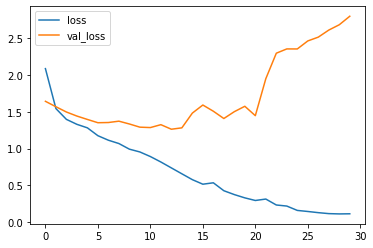

In [54]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

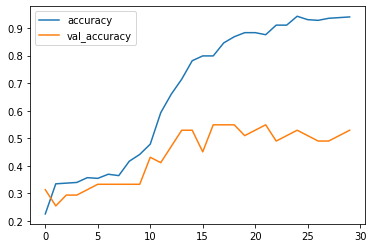

In [55]:
metrics[['accuracy', 'val_accuracy']].plot();

## Transfer Learning


In [61]:
# tentukan base model(extraktor fitur)
# ResNet
from tensorflow.keras.applications import resnet_v2
base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3),
                                  include_top=False,
                                  weights='imagenet')

94683136/94668760 [==============================] - 1s 0us/step


In [63]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model_tl = Sequential([base_model, 
                       GlobalAveragePooling2D(),
                       Dropout(0.2),
                       Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

model_tl.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model_tl.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

Epoch 1/30
13/13 [==============================] - 40s 2s/step - loss: 1.5294 - accuracy: 0.3970 - val_loss: 3.0997 - val_accuracy: 0.2353
Epoch 2/30
13/13 [==============================] - 26s 2s/step - loss: 0.8795 - accuracy: 0.6427 - val_loss: 26.5996 - val_accuracy: 0.1765
Epoch 3/30
13/13 [==============================] - 25s 2s/step - loss: 0.6609 - accuracy: 0.7370 - val_loss: 9.4354 - val_accuracy: 0.1765
Epoch 4/30
13/13 [==============================] - 25s 2s/step - loss: 0.6408 - accuracy: 0.7171 - val_loss: 22.4989 - val_accuracy: 0.2549
Epoch 5/30
13/13 [==============================] - 25s 2s/step - loss: 0.5655 - accuracy: 0.7345 - val_loss: 51.7746 - val_accuracy: 0.1765
Epoch 6/30
13/13 [==============================] - 25s 2s/step - loss: 0.6305 - accuracy: 0.7320 - val_loss: 430.3009 - val_accuracy: 0.1765
Epoch 7/30
13/13 [==============================] - 26s 2s/step - loss: 0.5342 - accuracy: 0.7866 - val_loss: 125.3786 - val_accuracy: 0.2941
Epoch 8/30
13

In [64]:
# inference
from google.colab import files

files.upload()

Saving download.jpeg to download.jpeg


{'download.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x13\x12\x13\x16\x15\x15\x17\x17\x15\x18\x17\x17\x18\x17\x17\x18\x18\x18\x15\x18\x18\x17\x17\x15\x17\x19\x18\x18\x1f( \x18\x1d%\x1d\x16\x17"1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% &.--------/-/---/-----+--/2------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x03\x04\x05\x06\x01\x07\xff\xc4\x00>\x10\x00\x02\x01\x02\x04\x03\x05\x04\t\x03\x04\x02\x03\x01\x00\x00\x01\x02\x11\x00\x03\x04\x12!1\x05AQ\x06\x13"aq2\x81\x91\xf0\x14#BRb\xa1\xb1\xc1\xd1\x07r\xe1\x153\x82\xf1c\xa2$\xb2\xd2\x16\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x004\x11\x00\x01\x03\x02\x03\x05\x07\x04\x02\x02\x03\x01\x00\x00\x00\x00\x01\x00\x02\x11\x03!\x041

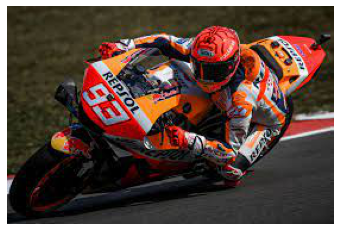

In [65]:
new_img = mpimg.imread('download.jpeg')
plt.imshow(new_img);
plt.axis(False);

In [66]:
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize

def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [67]:
new_img = load_and_preprocess('download.jpeg')
new_img.shape

TensorShape([224, 224, 3])

In [68]:
from tensorflow import expand_dims
# benerin dimensi
new_img = expand_dims(new_img, axis=0)
new_img.shape

TensorShape([1, 224, 224, 3])

In [69]:
res = model.predict(new_img)
res.argmax()

0

In [70]:
train_data.class_indices

{'dovizioso': 0,
 'lorenzo': 1,
 'marquez': 2,
 'pedrosa': 3,
 'rossi': 4,
 'vinales': 5}